Projeto de Análise de Dados através dos resultados dos Jogos Olímpicos de Paris 2024

Importando as bibliotecas e a base de dados

In [17]:
# Importando as bibliotecas a seren utilizadas no projeto
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Python 2412/Projeto Olimpiadas /olympics2024.csv')


Análisando os dados da Base de Dados

In [19]:
df.head(10)

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
5,6,Netherlands,NED,15,7,12,34
6,7,Great Britain,GBG,14,22,29,65
7,8,South Korea,KOR,13,9,10,32
8,9,Italy,ITA,12,13,15,40
9,10,Germany,GER,12,13,8,33


In [20]:
df.isnull().sum()

,0
Rank,0
Country,0
Country Code,0
Gold,0
Silver,0
Bronze,0
Total,0


In [21]:
df.nunique()

,0
Rank,63
Country,91
Country Code,91
Gold,18
Silver,16
Bronze,19
Total,27


In [22]:
# Após analisar a base de dados considerei que a coluna Country Code não seria essencial para o projeto

novo_df = df.drop('Country Code', axis=1)
novo_df = novo_df.reset_index(drop=True)
novo_df.head()

,Rank,Country,Gold,Silver,Bronze,Total
0,1,United States,40,44,42,126
1,2,China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France,16,26,22,64


In [23]:
# Criando novas colunas para tipos de medalha

# Medalha de Ouro
novo_df['first'] = novo_df['Gold'].apply(lambda x: x > 0)
# Medalha de Prata
novo_df['Second'] = novo_df['Silver'].apply(lambda x: x > 0)
# Medalha de Bronze
novo_df['Third'] = novo_df['Bronze'].apply(lambda x: x > 0)

In [24]:
novo_df

,Rank,Country,Gold,Silver,Bronze,Total,first,Second,Third
0,1,United States,40,44,42,126,True,True,True
1,2,China,40,27,24,91,True,True,True
2,3,Japan,20,12,13,45,True,True,True
3,4,Australia,18,19,16,53,True,True,True
4,5,France,16,26,22,64,True,True,True
...,...,...,...,...,...,...,...,...,...
86,84,Peru,0,0,1,1,False,False,True
87,84,Qatar,0,0,1,1,False,False,True
88,84,Singapore,0,0,1,1,False,False,True
89,84,Slovakia,0,0,1,1,False,False,True


Visualização de Dados

In [26]:
# Filtrar Países com pelo menos uma medalha em ordem descrescente

ouro_df = novo_df[novo_df['first']].sort_values(by='Gold', ascending=False) #Medalhas de Ouro
prata_df = novo_df[novo_df['Second']].sort_values(by='Silver', ascending=False) #Medalhas de Prata
bronze_df = novo_df[novo_df['Third']].sort_values(by='Bronze', ascending=False) #Medalhas de Bronze

In [27]:
# Obtendo a soma de cada tipo de medalha

ouro = ouro_df['Gold'].sum()
prata = prata_df['Silver'].sum()
bronze = bronze_df['Bronze'].sum()

Distribuição de Medalhas

In [30]:
medals = [ouro, prata, bronze]
names  = ['Ouro', 'Prata', 'Bronze']
color  = ['gold', 'silver', '#CD7F32']

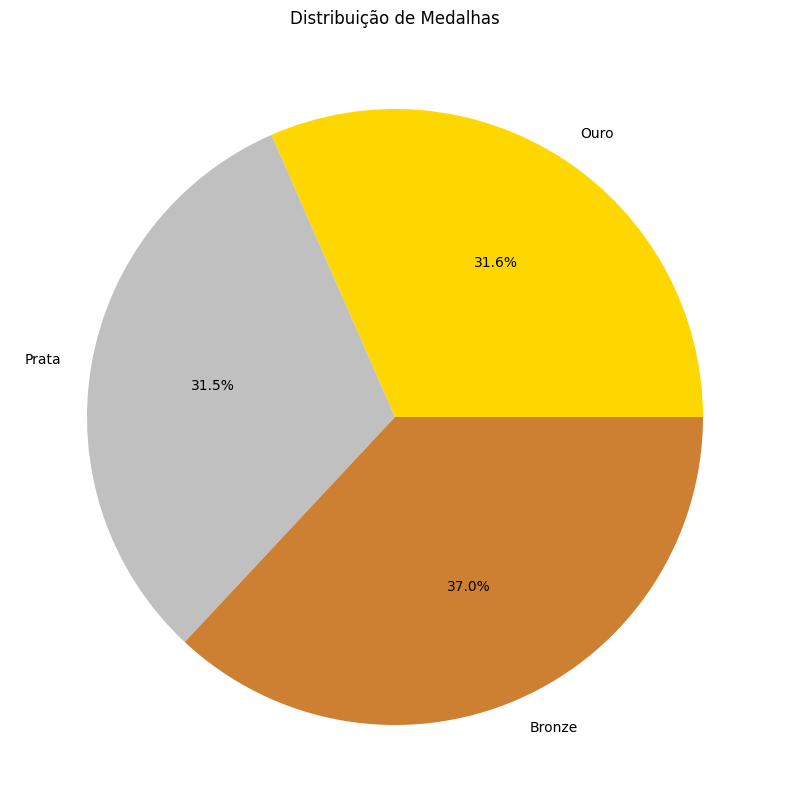

In [31]:
plt.figure(figsize=(10, 10))
plt.pie(medals, labels=names, colors=color, autopct='%.1f%%')
plt.title('Distribuição de Medalhas')
plt.show()


Distribuição de Medalhas por País

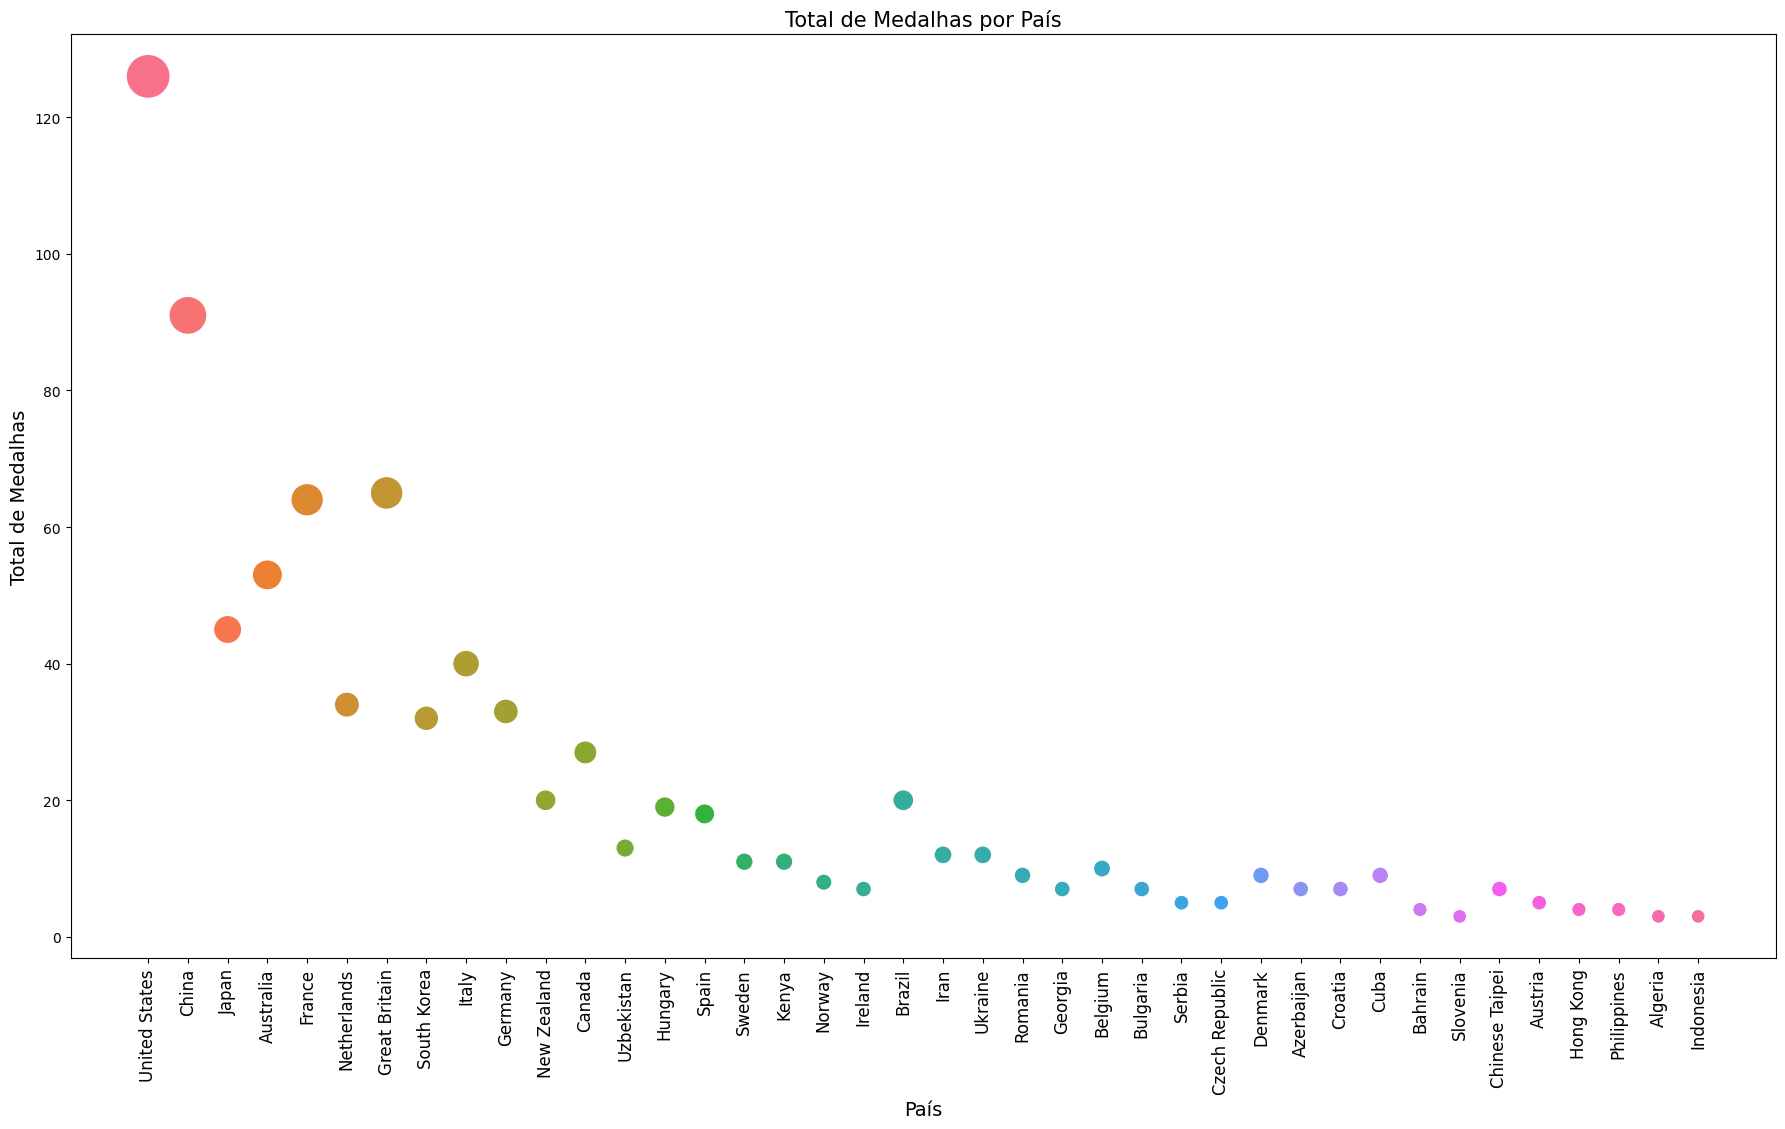

In [40]:
plt.figure(figsize=(22, 12))
sns.scatterplot(data=novo_df.head(40), x='Country', y='Total', size='Total', sizes=(100, 1000), hue='Country', legend=False)
plt.xlabel('País', fontsize=14)
plt.ylabel('Total de Medalhas', fontsize=14)
plt.title('Total de Medalhas por País', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.show()

Distribuição de Medalhas por País

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Great Britain'),
  Text(7, 0, 'South Korea'),
  Text(8, 0, 'Italy'),
  Text(9, 0, 'Germany'),
  Text(10, 0, 'New Zealand'),
  Text(11, 0, 'Canada'),
  Text(12, 0, 'Uzbekistan'),
  Text(13, 0, 'Hungary'),
  Text(14, 0, 'Spain'),
  Text(15, 0, 'Ireland'),
  Text(16, 0, 'Norway'),
  Text(17, 0, 'Kenya'),
  Text(18, 0, 'Sweden'),
  Text(19, 0, 'Bulgaria'),
  Text(20, 0, 'Brazil'),
  Text(21, 0, 'Iran'),
  Text(22, 0, 'Ukraine'),
  Text(23, 0, 'Romania'),
  Tex

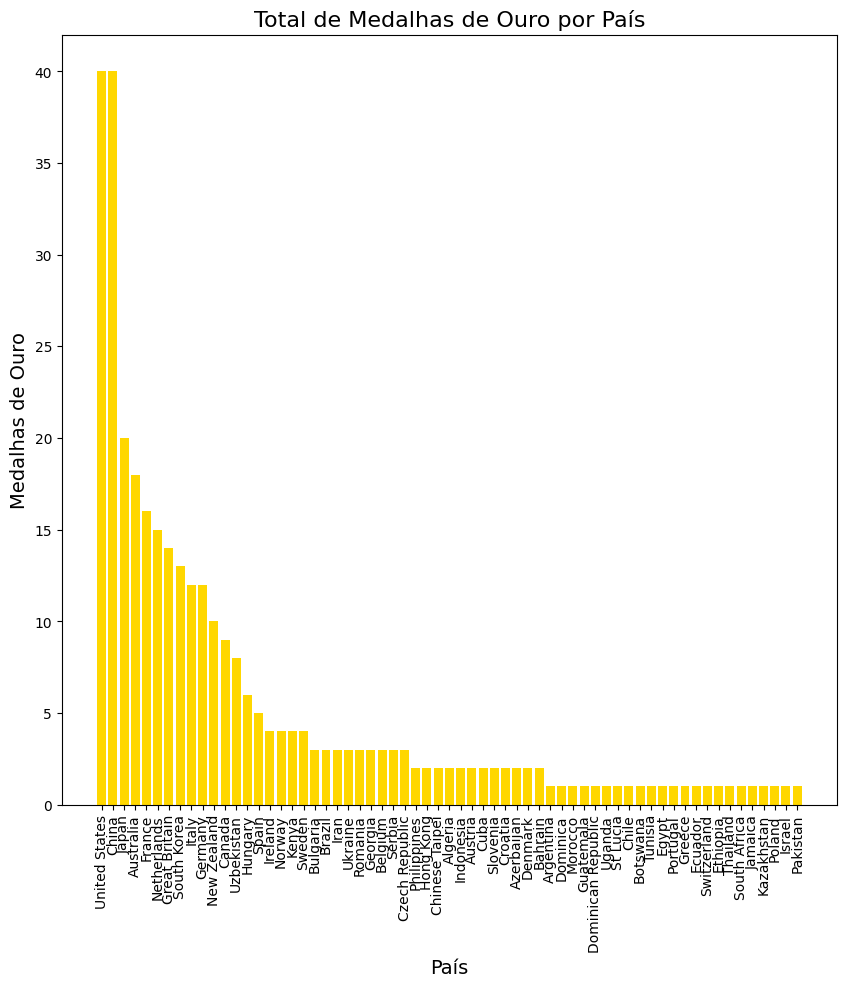

In [45]:
# Total de Medalhas de Ouro por País
plt.figure(figsize=(10,10))
plt.bar(ouro_df['Country'], ouro_df['Gold'], color='gold')
plt.title("Total de Medalhas de Ouro por País", fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Medalhas de Ouro', fontsize=14)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'China'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Great Britain'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'Japan'),
  Text(8, 0, 'South Korea'),
  Text(9, 0, 'Brazil'),
  Text(10, 0, 'Netherlands'),
  Text(11, 0, 'New Zealand'),
  Text(12, 0, 'Canada'),
  Text(13, 0, 'Hungary'),
  Text(14, 0, 'Iran'),
  Text(15, 0, 'Ukraine'),
  Text(16, 0, 'Israel'),
  Text(17, 0, 'Poland'),
  Text(18, 0, 'Sweden'),
  Text(19, 0, 'Spain'),
  Text(20, 0, 'Romania'),
  Text(21, 0, 'Turkey'),
  Text(22, 0, 'Armenia'),
  Text(23, 0, 'Colombia

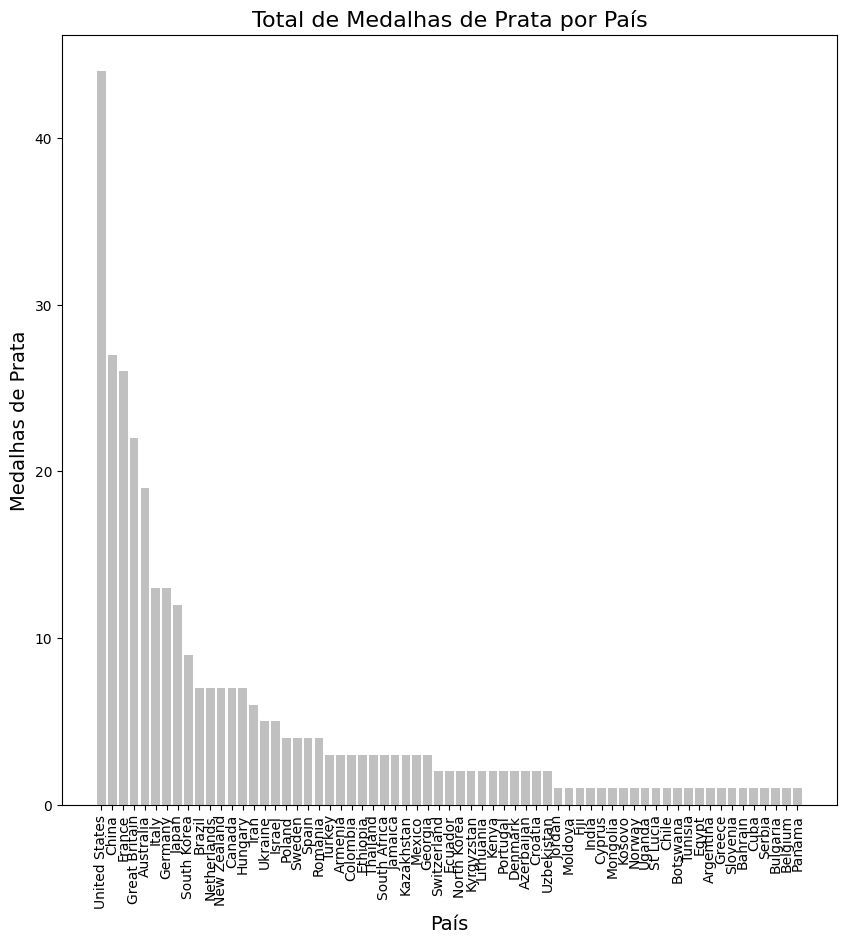

In [46]:
# Total de Medalhas de Prata por País
plt.figure(figsize=(10,10))
plt.bar(prata_df['Country'], prata_df['Silver'], color='silver')
plt.title('Total de Medalhas de Prata por País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Medalhas de Prata', fontsize=14)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Great Britain'),
  Text(2, 0, 'China'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'Netherlands'),
  Text(8, 0, 'Canada'),
  Text(9, 0, 'Brazil'),
  Text(10, 0, 'South Korea'),
  Text(11, 0, 'Spain'),
  Text(12, 0, 'Germany'),
  Text(13, 0, 'Greece'),
  Text(14, 0, 'Belgium'),
  Text(15, 0, 'Cuba'),
  Text(16, 0, 'Hungary'),
  Text(17, 0, 'Kenya'),
  Text(18, 0, 'Turkey'),
  Text(19, 0, 'Switzerland'),
  Text(20, 0, 'Poland')

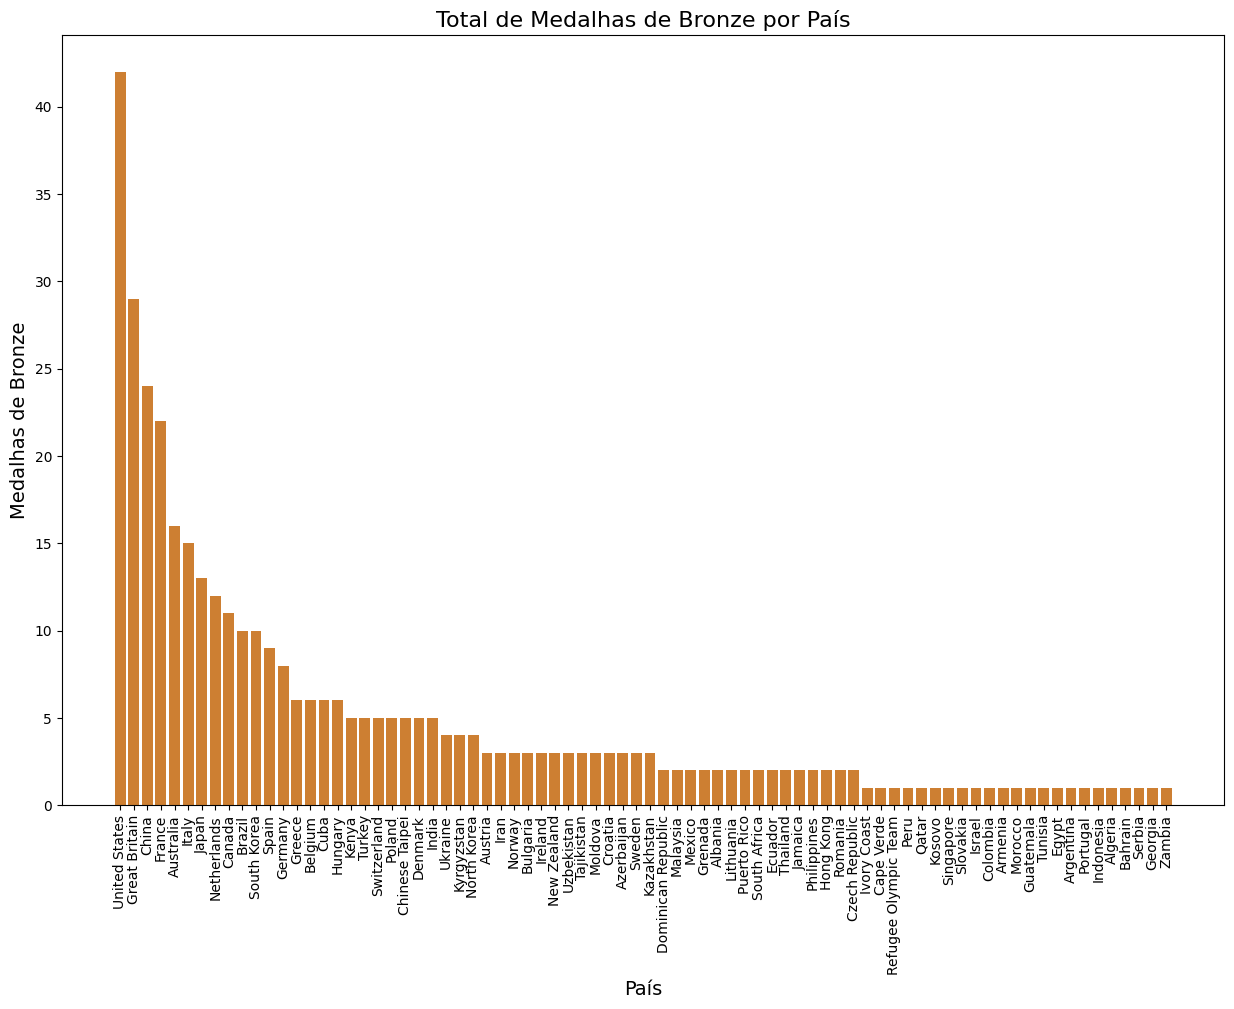

In [53]:
# Total de Medalhas de Prata por País
plt.figure(figsize=(15,10))
plt.bar(bronze_df['Country'], bronze_df['Bronze'], color='#CD7F32')
plt.title('Total de Medalhas de Bronze por País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Medalhas de Bronze', fontsize=14)
plt.xticks(rotation=90)